In [1]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from MH import MetroHast

## Metropolis-Hastings

In [2]:
def posterior(x):
    loc_1, scale_1 = 2, 1
    loc_2, scale_2 = -1, 0.5
    pdf = 0.5 * 1/np.sqrt(2*np.pi*scale_1*scale_1)*np.exp(-(x-loc_1)**2/2/scale_1/scale_1)
    pdf += 0.5 * 1/np.sqrt(2*np.pi*scale_2*scale_2)*np.exp(-(x-loc_2)**2/2/scale_2/scale_2)
    return pdf

sampler = MetroHast(post=posterior, sig=0.1)
res = sampler.run(10000, xinit=0) 

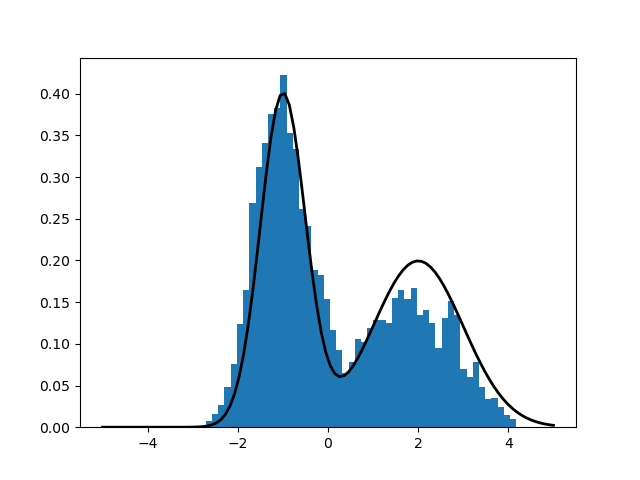

In [3]:
x = np.linspace(-5,5,100)
y = posterior(x)
plt.plot(x,y,color='k',lw=2)
plt.hist(res,bins=50,density=True,histtype='barstacked',color='C0')
plt.show()

200


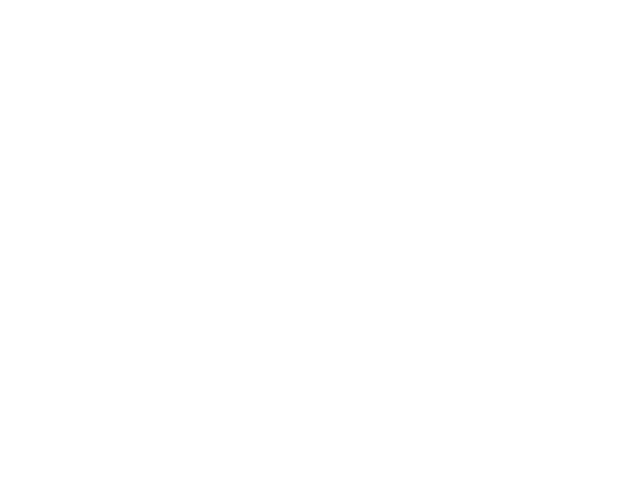

/Users/alanzhou/opt/anaconda3/envs/research/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6643: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


In [4]:
import matplotlib.animation as animation

def run_anim(data,step_size,bins):
    n = int(len(data)/step_size)
    print(n)
    def update(curr):
        if curr == n:
            a.event_source.stop()
        plt.cla()
        plt.hist(data[:curr*step_size], bins = bins, density=True, histtype='barstacked')
        plt.axis([-5, 5, 0, 0.5])
        plt.gca().set_title('Metropolis Hasting')
        plt.gca().set_ylabel('frequency')
        plt.gca().set_xlabel('value')
        plt.gca().annotate('n samples ={}'.format(curr*step_size), [3, 0.3])

    fig = plt.figure()
    a = animation.FuncAnimation(fig, update, interval = 100)

    plt.show()
    
bins = np.arange(-5, 5, 0.1)
run_anim(data=res,step_size=50,bins=bins)